<a href="https://colab.research.google.com/github/charithrd/Python-E-Learning/blob/main/T5_Sci_Kit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

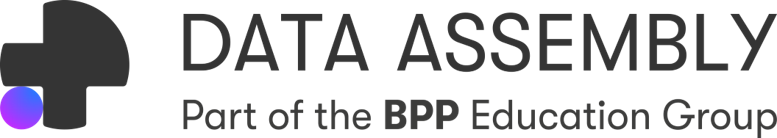

<h3><font color="#AA00BB">How you can use this Notebook</font></h3>
<p>This notebook was written to teach new concepts in data using Python.</p>
<p>You can read through the descriptions run the code (it should work!), or you may be taken through the code by one of our experts.</p>
<p>But one of the best habits to acquire is to re-write the code yourself.</p>
<ul><li>Experiment
<li>Break the code
<li>Build a deeper understanding of both the underlying data concepts and the code</ul>
<p>Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to write more code.</p>
<p>Enjoy!</p>
<p> - <i><font color="#AA00BB">Data Assembly team.</font></i></p>
<br>

> ❓🤔 = a question for us discuss

> ⌨️ = a task for you to try

> 🔑 = an authoritative reference or guide you may find useful

> 🚀 = **optional** material to develop yourself further



<a name="contents"></a>
## Contents

<br>1. [Data Loading and Exploration](#section_1)
<br>2. [Data Pre-processing Using Sci-kit Learn](#section_2)
<br>3. [Create and Train the Linear Regression Model](#section_3)
<br>4. [Model Performance Analysis](#section_4)
<br>5. [Logistic Regression - Predicting Origin Source](#section_5)
<br>6. [🚀Testing Multiple Classification Models using Pipelines](#section_6)


<h2><font color="#AA00BB">Welcome to our workbook on Scikit-learn: An End-to-End Project with FitConstructor Data</font></h2>

Welcome to this quick tutorial on machine learning using Python's **Scikit-learn** library.

**Scikit-learn** is an open-source machine learning library that provides a wide array of supervised and unsupervised learning algorithms. Its versatile nature makes it ideal for everything from quick prototyping to solving complex problems. Whether you're new to data science or a seasoned expert, Scikit-learn offers functionalities that cater to everyone's needs.


In this lesson, **we'll walkthrough an end-to-end machine learning project using a FitConstructor dataset**. We'll cover preprocessing, feature engineering, and model building for both regression and classification tasks.

Let's start learning the amazing Sci-kit Learn library in Python.

---

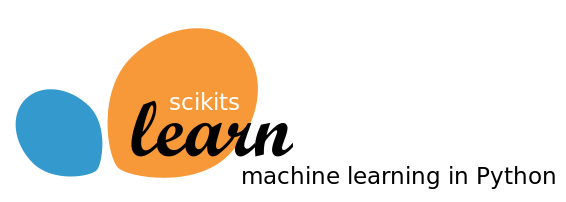

**Learn more here from the official Sci-kit Learn Documentation** 🔑 https://scikit-learn.org/stable/user_guide.html

#**1. Data Loading and Exploration**

Problem - FitConstructor's customer experience team wants to understand how to predict the number of times a customer would have used the equipment given the information we have on them.

They've supplied you with some customer data.

As a budding data scientist you know the first step in any data project is understanding the data.

Let's perform a simple Exploratory Data Analysis exercise to understand the dataset's:
 - basic structure
 - properties
 - distributions
 - data quality

## **A bookstore XML Database**

Imagine we've scraped data from an XML database.

Here we have created a sample of the file, you will be learning to use **Element Tree (etree)** from the **lxml** library to query this file.

Let's begin!

   Unnamed: 0  user_id                 name  gender  \
0           0        0     Mrs Katie Hudson  female   
1           1        1       Mr Sam Simmons    male   
2           2        2     Lorraine Bentley  female   
3           3        3  Ms Kimberley Walker  female   
4           4        4     Kimberley Taylor  female   

                                         address date_of_birth  \
0        979 Marcus mall, Mitchellside, HP23 5HR    23/10/1960   
1  Studio 77U, Arthur lock, Tomchester, NP19 9TL    25/09/1995   
2  Flat 89, Williams avenue, Katieville, CT3 1BA    22/03/1966   
3      6 Cameron freeway, Beverleymouth, M14 5GA    22/04/1975   
4         Flat 0, Thomas trace, New Tom, KY8 2EU    20/04/1978   

           email_address  height_cm  weight_kg account_create_date  \
0     m*****ka@yahoo.com        171         49          02/03/2022   
1   m*******sa@gmail.com        164         53          29/01/2022   
2  l******be@hotmail.com        177         87          13/03/

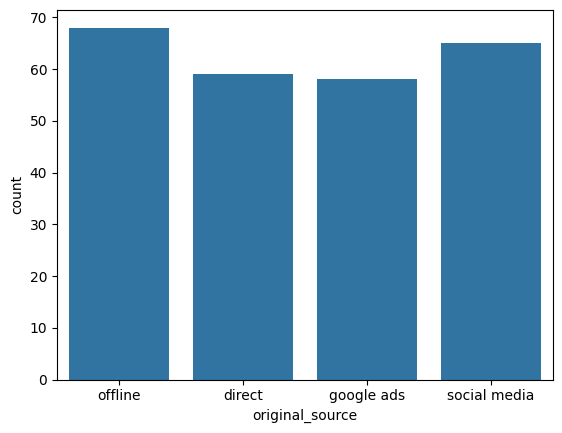

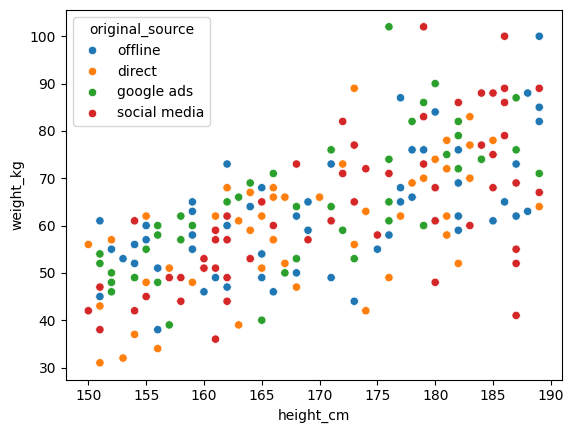

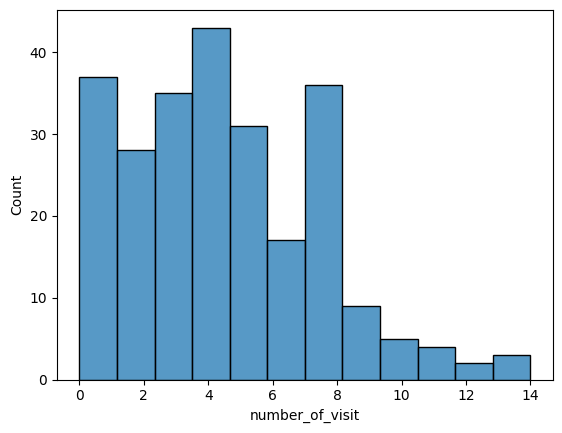

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/BPP-Digital-Advanced-Data-Analytics/public_datasets/main/fitconstructor/crm_user.csv')

# Display the first few rows
print(df.head())

# Basic statistics
print(df.describe())

# Simple visualisation
sns.countplot(x='original_source', data=df)
plt.show()

sns.scatterplot(x='height_cm', y='weight_kg', hue='original_source', data=df)
plt.show()

# Histogram for number_of_visit
sns.histplot(df['number_of_visit'], kde=False)
plt.show()

### **What can we learn from our EDA above?**
- The dataset consists of 250 rows and 16 columns.

**Columns in the dataset**
- Unnamed: 0: Seems like an index column
- user_id: User ID
- name: Name of the user
- gender: Gender of the user
- address: Address of the user
- date_of_birth: Date of birth of the user
- email_address: Masked email address of the user
- height_cm: Height in centimetres
- weight_kg: Weight in kilograms
- account_create_date: Date of account creation
- bike_serial: Bike serial number
- email: Another masked email column, seems redundant
- number_of_visit: Number of visits to the site/shop
- first_purchase_date: Date of first purchase
- original_source: Source from where the user was acquired

**Basic Statistics:**
- height_cm: Ranges from 150 cm to 189 cm with a mean of ~169.5 cm.
- weight_kg: Ranges from 31 kg to 102 kg with a mean of ~62.3 kg.
- number_of_visit: Ranges from 0 to 14 visits with a mean of ~4.45

**Data Quality**
- The dataset seems to be relatively clean but does have a redundant column (email and email_address seem to carry the same information). Additionally, there's an 'Unnamed: 0' column that seems to serve as an index and might be unnecessary.

**Feature Engineering**
- To enhance the dataset, features like 'age' could be derived from the 'date_of_birth'. Also, categorising heights and weights into bins could be useful for certain types of analysis.

**NOTE**
 - The '**number_of_visit**' feature could be useful for analysing user engagement. Businesses might want to focus on why some users visit more often than others and devise strategies to increase engagement.

 ---

## ⌨️**Exercise**

1. Plot the correlation matrix between numerical variables like height, weight, and number_of_visit.

**Hint**: You can use sns.heatmap() with the correlation matrix from Pandas (df.corr()).

---

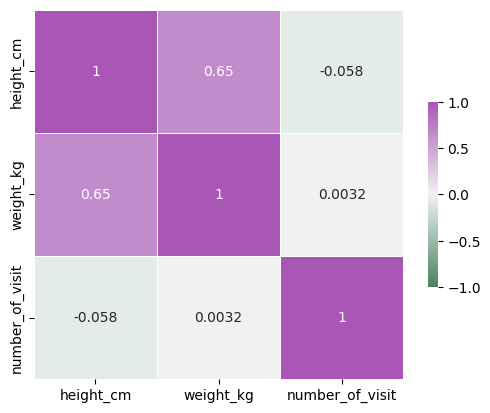

In [13]:
# Calculate the correlation between numerical variables height, weight, and number_of_visit
corr = df[['height_cm', 'weight_kg', 'number_of_visit']].corr()

# Using below coding we calculate correlation between all numeric columns in the dataset. However, commented out as not needed for the exercise.
# corr = df.corr(numeric_only=True)
# f, ax = plt.subplots(figsize=(10, 8))

# Defining the colour mapping using Seaborn Diverging palette
cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)

# Display the correlation matrix as a heatmap
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

# **2. Data Pre-processing Using Sci-kit Learn**

**So, why does data need to be pre-processed?**

In the world of data science, the idiom "garbage in, garbage out" is apt. The quality of the input directly determines the quality of the output. Real-world data is often messy, inconsistent, and not immediately suitable for building machine learning models. Raw data can have a multitude of issues, including:

1. Variability in scales - Different features can be measured in varying
units and scales
2. Missing values - Gaps or absent data points can skew results
3. Outliers - Extreme values can distort predictions
4. Irrelevant data - Not all information in the dataset might be useful
5. Redundancy - Duplicate or highly correlated features can bias models
6. Categorical values - Many algorithms expect numerical input

**Scikit-learn** has many built-in functions for performing a variety of pre-processing functions. It's also compatible with Pandas dataframes which makes it work seamlessly with our data processing workflows.

So, let's take a look at a few different pre-processing techniques in Scikit-learn.

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime

# Convert date of birth to age
current_year = datetime.now().year
df['age'] = current_year - pd.DatetimeIndex(df['date_of_birth']).year

# Define columns
num_cols = ['height_cm', 'weight_kg']
cat_cols = ['gender', 'original_source']

# Standardising numerical columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# One-hot encoding categorical columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Split the data
X = df[['age'] + num_cols + list(df.columns[df.columns.str.startswith(tuple(cat_cols))])]
y = df['number_of_visit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training data has - {len(X_train)} data points')
print(f'Testing data has - {len(y_test)} data points')
df.head()

Training data has - 200 data points
Testing data has - 50 data points


,Unnamed: 0,user_id,name,address,date_of_birth,email_address,height_cm,weight_kg,account_create_date,bike_serial,email,number_of_visit,first_purchase_date,age,gender_male,gender_unknown,original_source_google ads,original_source_offline,original_source_social media
0,0,0,Mrs Katie Hudson,"979 Marcus mall, Mitchellside, HP23 5HR",23/10/1960,m*****ka@yahoo.com,0.128856,-0.999837,02/03/2022,SN0000,m*****ka@yahoo.com,8,31/12/2021,64,False,False,False,True,False
1,1,1,Mr Sam Simmons,"Studio 77U, Arthur lock, Tomchester, NP19 9TL",25/09/1995,m*******sa@gmail.com,-0.482249,-0.699675,29/01/2022,SN0001,m*******sa@gmail.com,4,22/12/2021,29,True,False,False,False,False
2,2,2,Lorraine Bentley,"Flat 89, Williams avenue, Katieville, CT3 1BA",22/03/1966,l******be@hotmail.com,0.652660,1.851694,13/03/2022,SN0002,l******be@hotmail.com,2,01/03/2022,58,False,False,False,True,False
3,3,3,Ms Kimberley Walker,"6 Cameron freeway, Beverleymouth, M14 5GA",22/04/1975,m******ki@hotmail.com,0.827261,1.026251,05/12/2021,SN0003,m******ki@hotmail.com,6,09/04/2021,49,False,False,False,True,False
4,4,4,Kimberley Taylor,"Flat 0, Thomas trace, New Tom, KY8 2EU",20/04/1978,k*****ta@gmail.com,1.089163,1.476492,09/02/2022,SN0004,k*****ta@gmail.com,10,26/07/2022,46,False,False,False,False,False


### **So what did we just do in the above code?**

<h4><font color="#AA00BB">(Above) Look at the right most columns in the above data frame to see the new columns we've created.</font></h4>

We used sci-kit learn's built-in fucnctions to perform essential for data preprocessing that are required before we train the model. We performed:

1. **Convert Date of Birth to Age**
  - Use Python's `datetime` to get the current year.
  - Calculate age by subtracting the birth year from the current year.
  - **Syntax**: `pd.DatetimeIndex(df['date_of_birth']).year` extracts the year from the 'date_of_birth' column.
2. **Define Columns data types (categorical and numerical)**
  - Define numerical (`num_cols`) and categorical (`cat_cols`) columns to be processed.
3. **Standardise Numerical Columns**
  - Use `StandardScaler` to standardise numerical columns to unit variance (i.e. mean of 0 and standard deviation of 1).
  - **Syntax**: `scaler.fit_transform(df[num_cols])` fits and transforms the data.
4. **One-hot Encode Categorical Columns**
  - Use `pd.get_dummies` to one-hot encode categorical variables.
  - **Syntax**: `drop_first=True` eliminates the first category to avoid collinearity.
  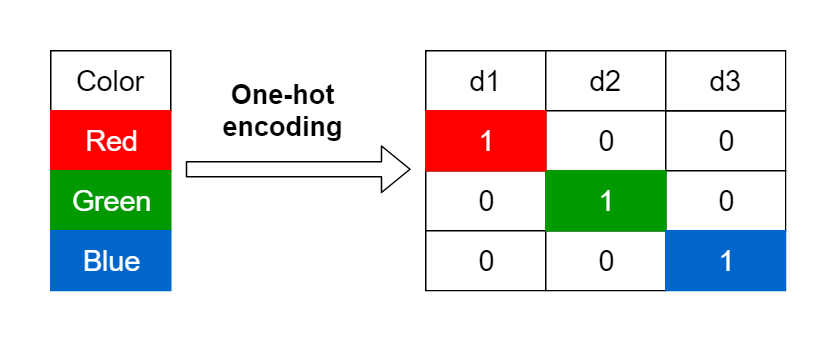
5. **Data Splitting - Train/Test split**
  - Define feature set (`X`) and target variable (`y`).
  - Use `train_test_split` to split the data into training and test sets.
  - **Syntax**: `test_size=0.2` denotes 20% (200 points for training, 50 for testing) of the data will be used for testing, and `random_state=42` sets the seed for reproducibility.

---

## ⌨️**Exercise**

1. Change the test-train split ratio and observe the size of the resulting data sets.
  - **Hint**: Modify the test_size parameter in `train_test_split()`.

2. Try using Min-Max scaling instead of standard scaling for numerical columns.
  - **Hint**: Replace `StandardScaler()` with `MinMaxScaler()` from scikit-learn's preprocessing module.

---

In [16]:
# Exercise 01

# Split the data train 70% and test 30%
X = df[['age'] + num_cols + list(df.columns[df.columns.str.startswith(tuple(cat_cols))])]
y = df['number_of_visit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training data has - {len(X_train)} data points')
print(f'Testing data has - {len(y_test)} data points')
df.head()

# Results
# Training data has - 175 data points (@20% - 200 data points)
# Testing data has - 75 data points   (@20% - 50 data points)

Training data has - 175 data points
Testing data has - 75 data points


,Unnamed: 0,user_id,name,address,date_of_birth,email_address,height_cm,weight_kg,account_create_date,bike_serial,email,number_of_visit,first_purchase_date,age,gender_male,gender_unknown,original_source_google ads,original_source_offline,original_source_social media
0,0,0,Mrs Katie Hudson,"979 Marcus mall, Mitchellside, HP23 5HR",23/10/1960,m*****ka@yahoo.com,0.128856,-0.999837,02/03/2022,SN0000,m*****ka@yahoo.com,8,31/12/2021,64,False,False,False,True,False
1,1,1,Mr Sam Simmons,"Studio 77U, Arthur lock, Tomchester, NP19 9TL",25/09/1995,m*******sa@gmail.com,-0.482249,-0.699675,29/01/2022,SN0001,m*******sa@gmail.com,4,22/12/2021,29,True,False,False,False,False
2,2,2,Lorraine Bentley,"Flat 89, Williams avenue, Katieville, CT3 1BA",22/03/1966,l******be@hotmail.com,0.652660,1.851694,13/03/2022,SN0002,l******be@hotmail.com,2,01/03/2022,58,False,False,False,True,False
3,3,3,Ms Kimberley Walker,"6 Cameron freeway, Beverleymouth, M14 5GA",22/04/1975,m******ki@hotmail.com,0.827261,1.026251,05/12/2021,SN0003,m******ki@hotmail.com,6,09/04/2021,49,False,False,False,True,False
4,4,4,Kimberley Taylor,"Flat 0, Thomas trace, New Tom, KY8 2EU",20/04/1978,k*****ta@gmail.com,1.089163,1.476492,09/02/2022,SN0004,k*****ta@gmail.com,10,26/07/2022,46,False,False,False,False,False


In [21]:
# Exercise 02: Using Min-Max scaling instead of standard scaling for numerical columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from datetime import datetime

# Convert date of birth to age
current_year = datetime.now().year
df['age'] = current_year - pd.DatetimeIndex(df['date_of_birth']).year

# Define columns
num_cols = ['height_cm', 'weight_kg']
cat_cols = ['gender', 'original_source']

# Standardising numerical columns
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# One-hot encoding categorical columns
# df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Split the data
X = df[['age'] + num_cols + list(df.columns[df.columns.str.startswith(tuple(cat_cols))])]
y = df['number_of_visit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training data has - {len(X_train)} data points')
print(f'Testing data has - {len(y_test)} data points')
df.head()

Training data has - 175 data points
Testing data has - 75 data points


,Unnamed: 0,user_id,name,address,date_of_birth,email_address,height_cm,weight_kg,account_create_date,bike_serial,email,number_of_visit,first_purchase_date,age,gender_male,gender_unknown,original_source_google ads,original_source_offline,original_source_social media
0,0,0,Mrs Katie Hudson,"979 Marcus mall, Mitchellside, HP23 5HR",23/10/1960,m*****ka@yahoo.com,0.538462,0.253521,02/03/2022,SN0000,m*****ka@yahoo.com,8,31/12/2021,64,False,False,False,True,False
1,1,1,Mr Sam Simmons,"Studio 77U, Arthur lock, Tomchester, NP19 9TL",25/09/1995,m*******sa@gmail.com,0.358974,0.309859,29/01/2022,SN0001,m*******sa@gmail.com,4,22/12/2021,29,True,False,False,False,False
2,2,2,Lorraine Bentley,"Flat 89, Williams avenue, Katieville, CT3 1BA",22/03/1966,l******be@hotmail.com,0.692308,0.788732,13/03/2022,SN0002,l******be@hotmail.com,2,01/03/2022,58,False,False,False,True,False
3,3,3,Ms Kimberley Walker,"6 Cameron freeway, Beverleymouth, M14 5GA",22/04/1975,m******ki@hotmail.com,0.743590,0.633803,05/12/2021,SN0003,m******ki@hotmail.com,6,09/04/2021,49,False,False,False,True,False
4,4,4,Kimberley Taylor,"Flat 0, Thomas trace, New Tom, KY8 2EU",20/04/1978,k*****ta@gmail.com,0.820513,0.718310,09/02/2022,SN0004,k*****ta@gmail.com,10,26/07/2022,46,False,False,False,False,False


# **3.  Create and Train the Linear Regression Model**

Once the data is ready, one can easily instantiate a model from scikit-learn's wide array of algorithms, and then fit it to the training data using the fit method, thereby training the model to make predictions or classifications.

This is a simple few lines of code, let's see how we do this!

In [22]:
from sklearn.linear_model import LinearRegression

# Initialise and train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# **4. Model Performance Analysis**

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# R-squared
score = regressor.score(X_test, y_test)
print(f'R-squared: {score}')

# MSE
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

R-squared: -0.019715036616848813
Mean Squared Error: 9.76098425450624
Mean Absolute Error: 2.5863483857702945


### **Interpretation of Results:**
- **R-squared:** The R-squared value is negative, which is unusual and indicates that the model performs worse than a horizontal line (a model with no predictive power). In a well-fitted model, we'd expect an R-squared value closer to 1. A negative value suggests that the model is a poor fit for the data.

- **Mean Squared Error (MSE)**: The MSE is 10.06, which is a measure of the average of the squares of the errors. The closer to 0 this is, the better the model has performed. Given that the R-squared is negative, the MSE doesn't offer much comfort either.

- **Mean Absolute Error (MAE)**: The MAE is 2.73, representing the average absolute difference between the observed actual outcomes and the predictions made by the model. Lower values are better, but given the other metrics, this value also indicates poor model performance.

So our model wasn't great, don't fret! in later lessons we'll learn tips on how to improve and analyse your model's performance.


# **5. Logistic Regression - Predicting Origin Source**

**What is a Classifier?**

In machine learning, a classifier is an algorithm that assigns a class label to a given input data point.

Classifiers work on the principle of mapping the input features to discrete categories or classes. For example, you might use a classifier to determine whether an email is spam or not spam, or to categorize customer reviews as positive, neutral, or negative.

**Why Classifier for this FitConstructor??**

Our Marketing Team would like to predict the **original_source** of account creation (e.g., direct, google ads, offline, social media).

Knowing the "**original_source**" of new accounts at FitConstructor is like having a GPS for your marketing spend. It tells you:

- **Where to Invest**: Pinpoint which channels—be it social media, Google Ads, or direct visits—are your gold mines.
- **Who's Coming**: Different channels attract different crowds. Customise your pitch accordingly.
- **Measure Success**: Tie back every dollar spent to a channel and measure the bang for your buck.
- **Strategise Smartly**: Is a channel underperforming? Time to pivot or fine-tune your approach.

We'll use logistic regression for this task, which is a type of classifier well-suited for binary or categorical dependent variables.


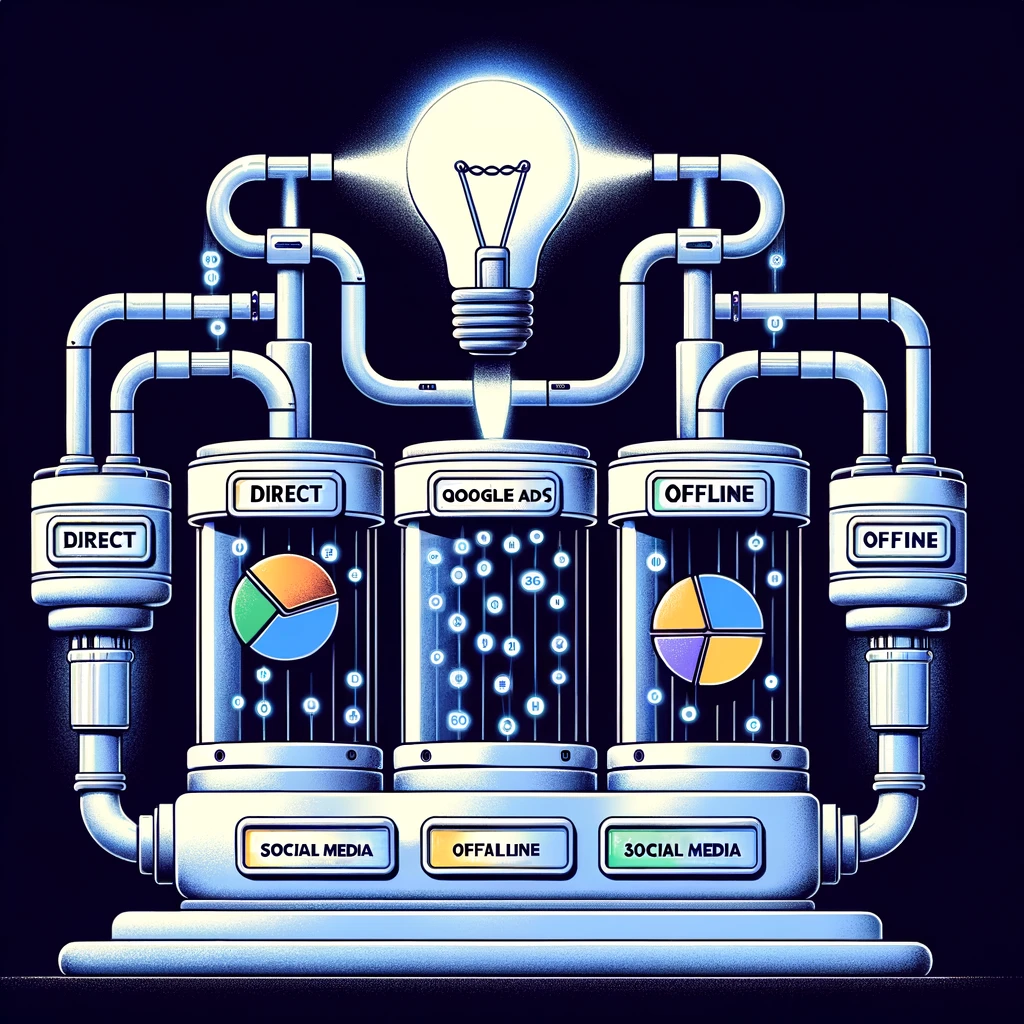
**Steps:**
- **Data Pre-processing:** Prepare the data for training.
- **Model Training**: Train a logistic regression model.
- **Evaluation**: Generate a confusion matrix and other metrics to evaluate the model's performance.

### **Let's first prepare our data**

The pre-processing steps performed in the code:

1. **Convert Date of Birth to Age:** Calculated the 'age' of individuals based on their 'date_of_birth'.
2. **Standardisation of Numerical Columns:** Standardised the 'height_cm' and 'weight_kg' columns using StandardScaler.
3. **One-hot Encoding of Categorical Columns**: One-hot encoded the 'gender' column, effectively converting it into numerical format.
4. **Feature Selection**: Selected 'age', standardised numerical columns, and one-hot encoded columns as features (X) for the model.
5. **Data Splitting**: Split the dataset into training (X_train, y_train) and testing (X_test, y_test) sets, with an 80-20 ratio.

In [24]:
# Import required libraries again due to execution state reset
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the new dataset
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/BPP-Digital-Advanced-Data-Analytics/public_datasets/main/fitconstructor/fitconstructor_crm_user_3.csv')

# Convert date of birth to age
current_year = datetime.now().year
df['age'] = current_year - pd.DatetimeIndex(df['date_of_birth']).year

# Define columns
num_cols = ['height_cm', 'weight_kg']
cat_cols = ['gender']

# Standardising numerical columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# One-hot encoding categorical columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Define X and y for classification
X = df[['age'] + num_cols + list(df.columns[df.columns.str.startswith(tuple(cat_cols))])]
y = df['original_source']

# Split the data for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.head()

,Unnamed: 0,user_id,name,address,date_of_birth,Unnamed: 6,email_address,height_cm,weight_kg,account_create_date,bike_serial,email,number_of_visit,first_purchase_date,original_source,age,gender_male,gender_unknown
0,5,5,Tony Moore,"Flat 4, Miah plaza, New Judithville, FY1 3AA",10/11/2001,21,t******m64@yahoo.com,1.001862,0.951210,21/01/2022,SN0005,t******m64@yahoo.com,22,17/12/2021,google ads,23,True,False
1,238,238,Miss Caroline Scott,"12 Todd squares, Tuckerchester, BB8 0BP",29/10/2001,21,m****c@yahoo.com,-1.355255,-1.525118,14/02/2022,SN0238,m****c@yahoo.com,9,02/01/2022,social media,23,False,False
2,186,186,Jodie Nicholson,"Flat 53p, Denis land, Lewisstad, L34 9HX",23/10/2001,21,j*****n@gmail.com,0.216156,0.801130,05/01/2022,SN0186,j*****n@gmail.com,10,06/04/2022,social media,23,False,False
3,57,57,Dr Jack Ahmed,"45 Wood expressway, Gemmabury, WF15 8AD",19/01/2001,22,d****ja@gmail.com,0.739960,1.026251,04/12/2021,SN0057,d****ja@gmail.com,24,06/03/2021,social media,23,True,False
4,95,95,Shane Lewis,"250 White green, Terrystad, OX12 0DE",20/01/2001,22,s*****l@hotmail.com,0.128856,0.125767,16/12/2021,SN0095,s*****l@hotmail.com,13,06/12/2021,google ads,23,True,False


## **Now let's train and analyse the results of training a Logestic Regression Classifier**

1. **`classifier = LogisticRegression()`**: This line initialises a logistic regression model from scikit-learn and assigns it to the variable `classifier`. At this point, the model is untrained.

2. **`classifier.fit(X_train, y_train)`**: This line trains the logistic regression model using the training data. `X_train` contains the feature variables, and `y_train` contains the corresponding target labels. The `.fit()` method adjusts the internal parameters of the model to learn the patterns in the training data.

In [25]:
# Initialise and train the logistic regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Generate confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy - {accuracy}%')
print(conf_matrix)

Accuracy - 0.44%
[[6 0 7 4]
 [4 5 1 2]
 [2 2 4 2]
 [1 1 2 7]]


## **Interpreation of Results**

- **Confusion Matrix**: The matrix shows that the model has a mix of correct and incorrect classifications across different categories. For example, in the first row representing the first class, 6 were correctly classified, but 11 were misclassified into other classes.

- **Accuracy**: The overall accuracy of the model is 44% which is less than ideal.

While it does make some correct predictions, the confusion matrix indicates that there are also a fair number of misclassifications. This suggests that the model may need further fine-tuning or a different approach for better performance.

## ⌨️**Exercise**

1. Try using a **Decision Tree Classifier** and compare the results.

   - **Hint**: Import `DecisionTreeClassifier` from `sklearn.tree` and replace `LogisticRegression()` in the pipeline.



In [30]:
from sklearn.tree import DecisionTreeClassifier

# Initialise and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy - 0.4%


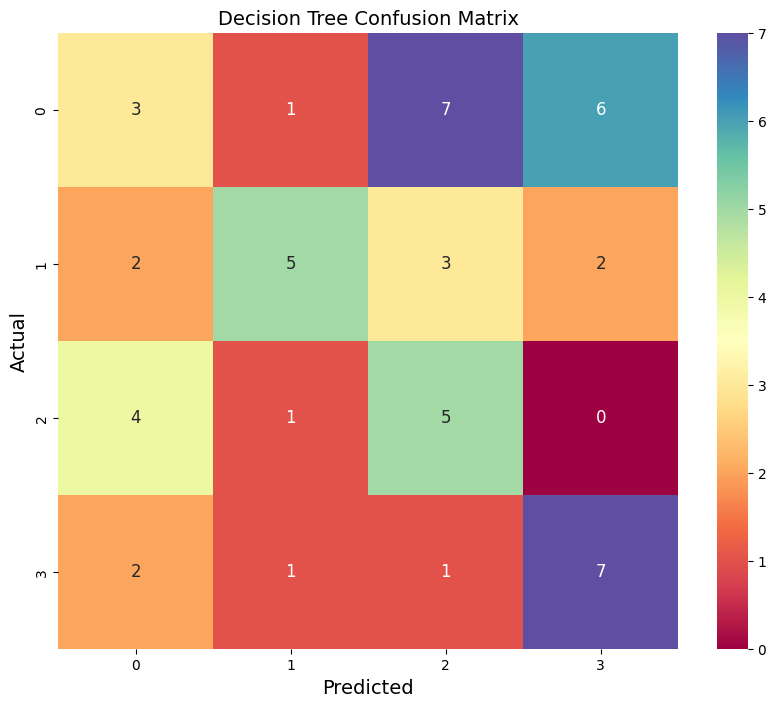

In [37]:
# Make predictions
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)

# Generate confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test,pred)

# Display model accuracy score
print(f'Accuracy - {accuracy}%')
# print(conf_matrix)

# Display confusion matrix as Seaborn heatmap
conf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(10, 8))
cmap = sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, annot_kws={"size": 12})
plt.title('Decision Tree Confusion Matrix', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.show()

# **6. Testing Multiple Classification Models using Pipelines (OPTIONAL)**

Scikit-learn's pipelines streamline the workflow of a machine learning project by encapsulating multiple steps, such as data preprocessing and model fitting, into a single estimator. This enhances code reusability, improves readability, and helps prevent common errors like data leakage between the training and test sets.


The code aims to evaluate the performance of different classification models (Logistic Regression, Random Forest, SVM, K-NN) on the same dataset by training them and testing their accuracy.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import pandas as pd

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-NN': KNeighborsClassifier()
}

# Collect results
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('classifier', model)])
    pipeline.fit(X_train, y_train)
    results[name] = pipeline.score(X_test, y_test)

# Display results
pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])

,Accuracy
Logistic Regression,0.44
Random Forest,0.40
SVM,0.34
K-NN,0.32


## **⌨️Exercise**

1. Add the **Naive Bayes Classifier** to the list of models to be tested.
  - **Hint**: Import `GaussianNB` from `sklearn.naive_bayes`.

2. Create a bar plot to visualise the accuracy of different models.
  - **Hint**: Convert the results dictionary to a Pandas DataFrame and then use `sns.barplot()`.






                     Accuracy
Logistic Regression      0.44
Random Forest            0.40
SVM                      0.34
K-NN                     0.32
Naive Bayes              0.32


<ipython-input-42-da13a7173dac>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette=palette)


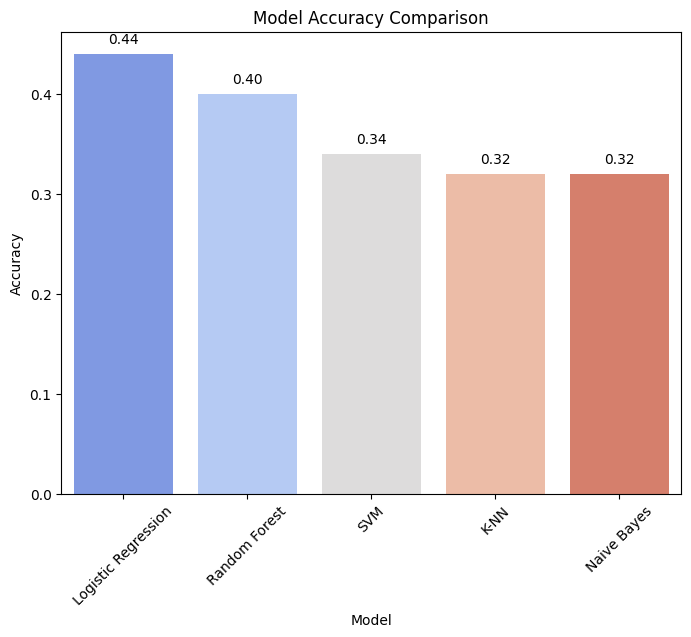

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB  # Import Naive Bayes
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()  # Add Naive Bayes to the list
}

# Collect results
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('classifier', model)])
    pipeline.fit(X_train, y_train)
    results[name] = pipeline.score(X_test, y_test)

# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])

# Display results as a table
print(results_df)

# Plot the accuracies using a bar plot
plt.figure(figsize=(8, 6))
palette = sns.color_palette("coolwarm", len(results_df))
sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette=palette)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
for index, value in enumerate(results_df['Accuracy']):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center')
plt.show()